In [ ]:
# importation of libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
covid_df = pd.read_csv("/Users/kolawolegeorge/data analysis/covid.csv")

In [ ]:
covid_df.head(10)

In [ ]:
# get information about the database
covid_df.info()

In [ ]:
# get the basic statical analysis
covid_df.describe()

In [ ]:
vaccine_df = pd.read_csv("/Users/kolawolegeorge/data analysis/vaccine.csv")

In [ ]:
covid_df.columns

In [ ]:
covid_df

In [ ]:
# removing variables that are not needed for the analysis
covid_df.drop(['Sno', 'Time', 'ConfirmedIndianNational',
              'ConfirmedForeignNational'], inplace=True, axis=1)


In [ ]:
covid_df.head(10)

In [ ]:
# convert date from object to datatime
covid_df.Date = pd.to_datetime(covid_df.Date, format='%Y-%m-%d')

In [ ]:
covid_df.info()

In [ ]:
# creating a new column caled active cases
covid_df["Active Case"] = covid_df.Confirmed - \
    (covid_df.Cured + covid_df.Deaths)


In [ ]:
covid_df.tail(10)

In [ ]:
# to calulate the cured, death etc per state
state_df = pd.pivot_table(covid_df, values=[
                          "Confirmed", "Cured", "Deaths"], index="State/UnionTerritory", aggfunc=sum)


In [ ]:
state_df

In [ ]:
# Recovery rate
state_df["Recovery Rate"] = state_df.Cured * 100 / state_df.Confirmed

In [ ]:
state_df.head(10)

In [ ]:
# Death rate
state_df["Death Rate"] = state_df.Deaths * 100 / state_df.Confirmed

In [ ]:
state_df.head(10)

In [ ]:
# sorting a table base on the value
state_df = state_df.sort_values(by="Confirmed", ascending=False)

In [ ]:
state_df.head(100)

In [ ]:
state_df.style.background_gradient(cmap="Wistia")

In [80]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Case
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [83]:
# top to active case by state
top_10_active_cases = covid_df.groupby(by=["State/UnionTerritory"]).max()[["Active Case", "Date"]].sort_values(by=["Active Case"], ascending=False).reset_index()


Text(0, 0.5, 'Top active cases')

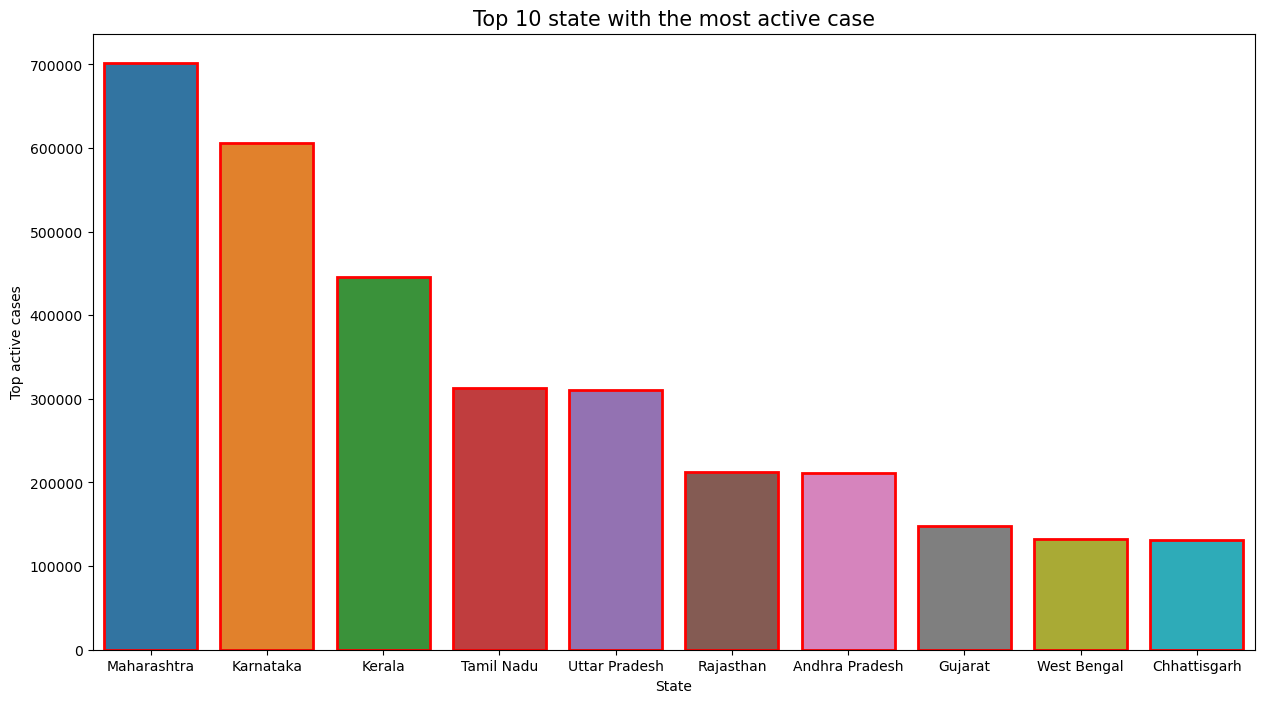

In [94]:
# VISLIZATION.
fig = plt.figure(figsize=(15, 8))

# title
plt.title("Top 10 state with the most active case", size=15)

# bar
ax = sns.barplot(
    data=top_10_active_cases.iloc[:10],
    y="Active Case",
    x="State/UnionTerritory",

    linewidth=2,
    edgecolor="red"
)

# label
plt.xlabel("State")
plt.ylabel("Top active cases")
# plt.show()

Text(0.5, 1.0, 'Top 5 state with the most active case')

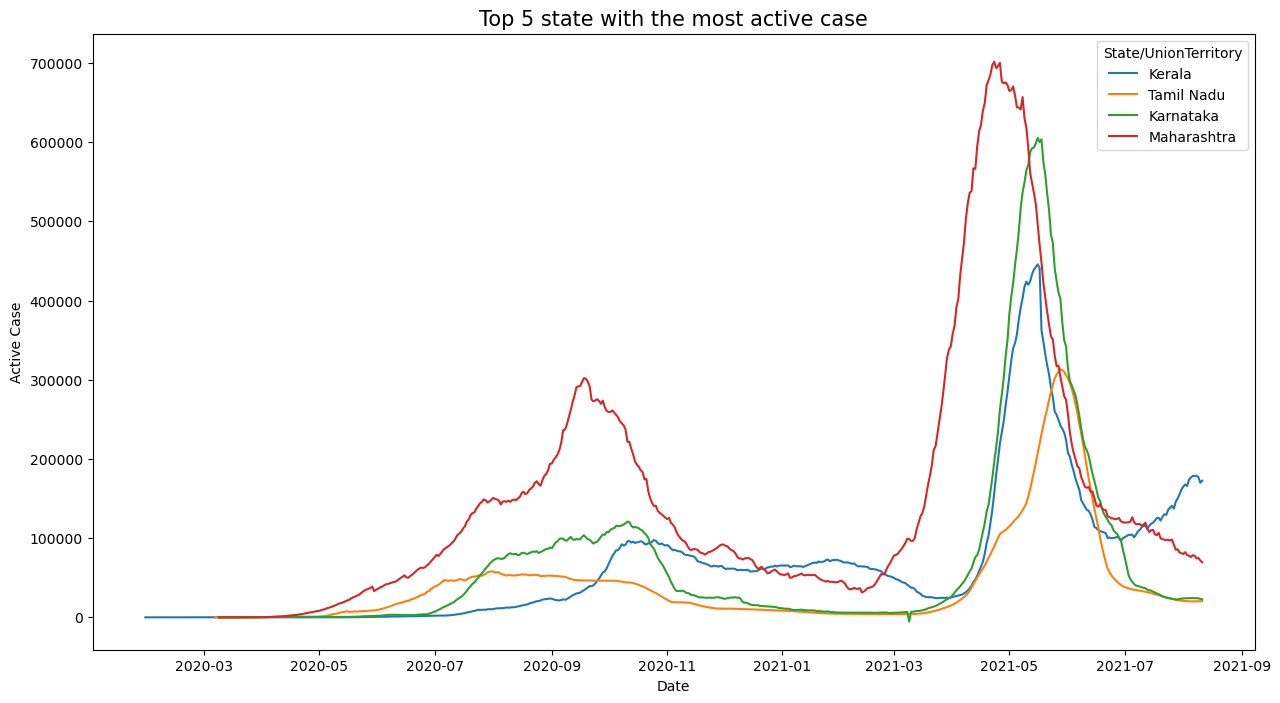

In [109]:
# VISLIZATION.
fig = plt.figure(figsize=(15, 8))

# title

# bar
ax = sns.lineplot(
    data=covid_df[covid_df["State/UnionTerritory"].isin(["Maharashtra", "Karnataka", "Kerala", "Tamil Nadu", "Uttar Predesh"])],
    y="Active Case",
    x="Date",


    hue="State/UnionTerritory"
)


plt.title("Top 5 state with the most active case", size=15)